In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("F:\Assignments\Random Forests\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df1.shape

(600, 6)

In [8]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
import warnings
warnings.filterwarnings("ignore")

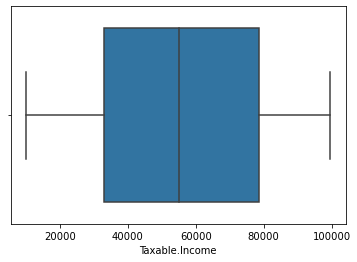

In [11]:
ax = sns.boxplot(df1['Taxable.Income'])

In [12]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


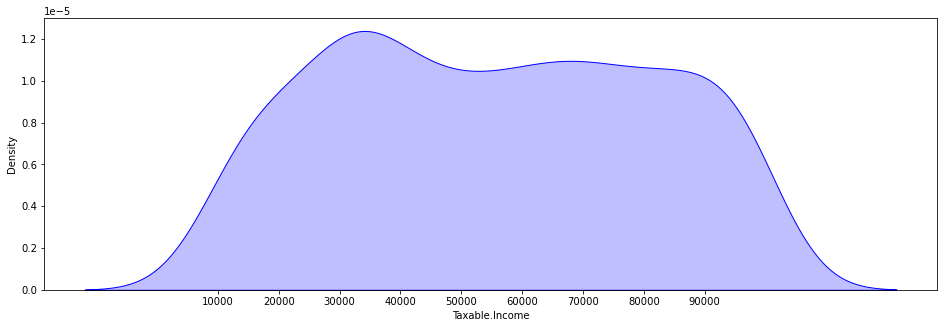

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

In [14]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

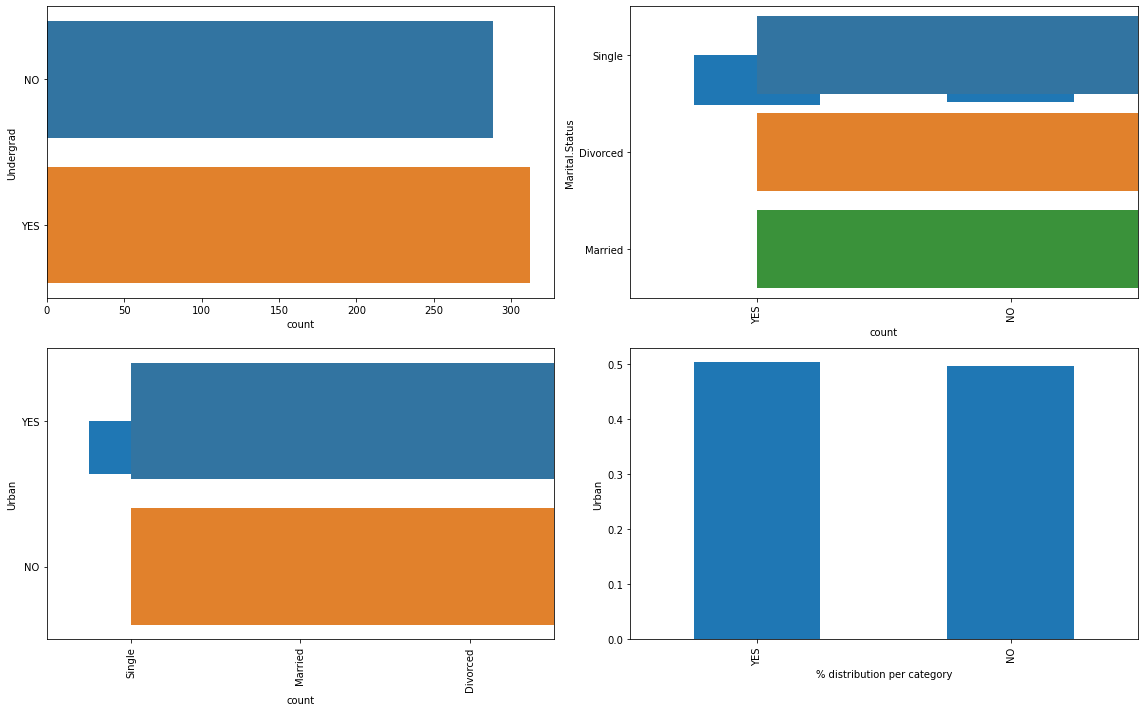

In [15]:

plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [16]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

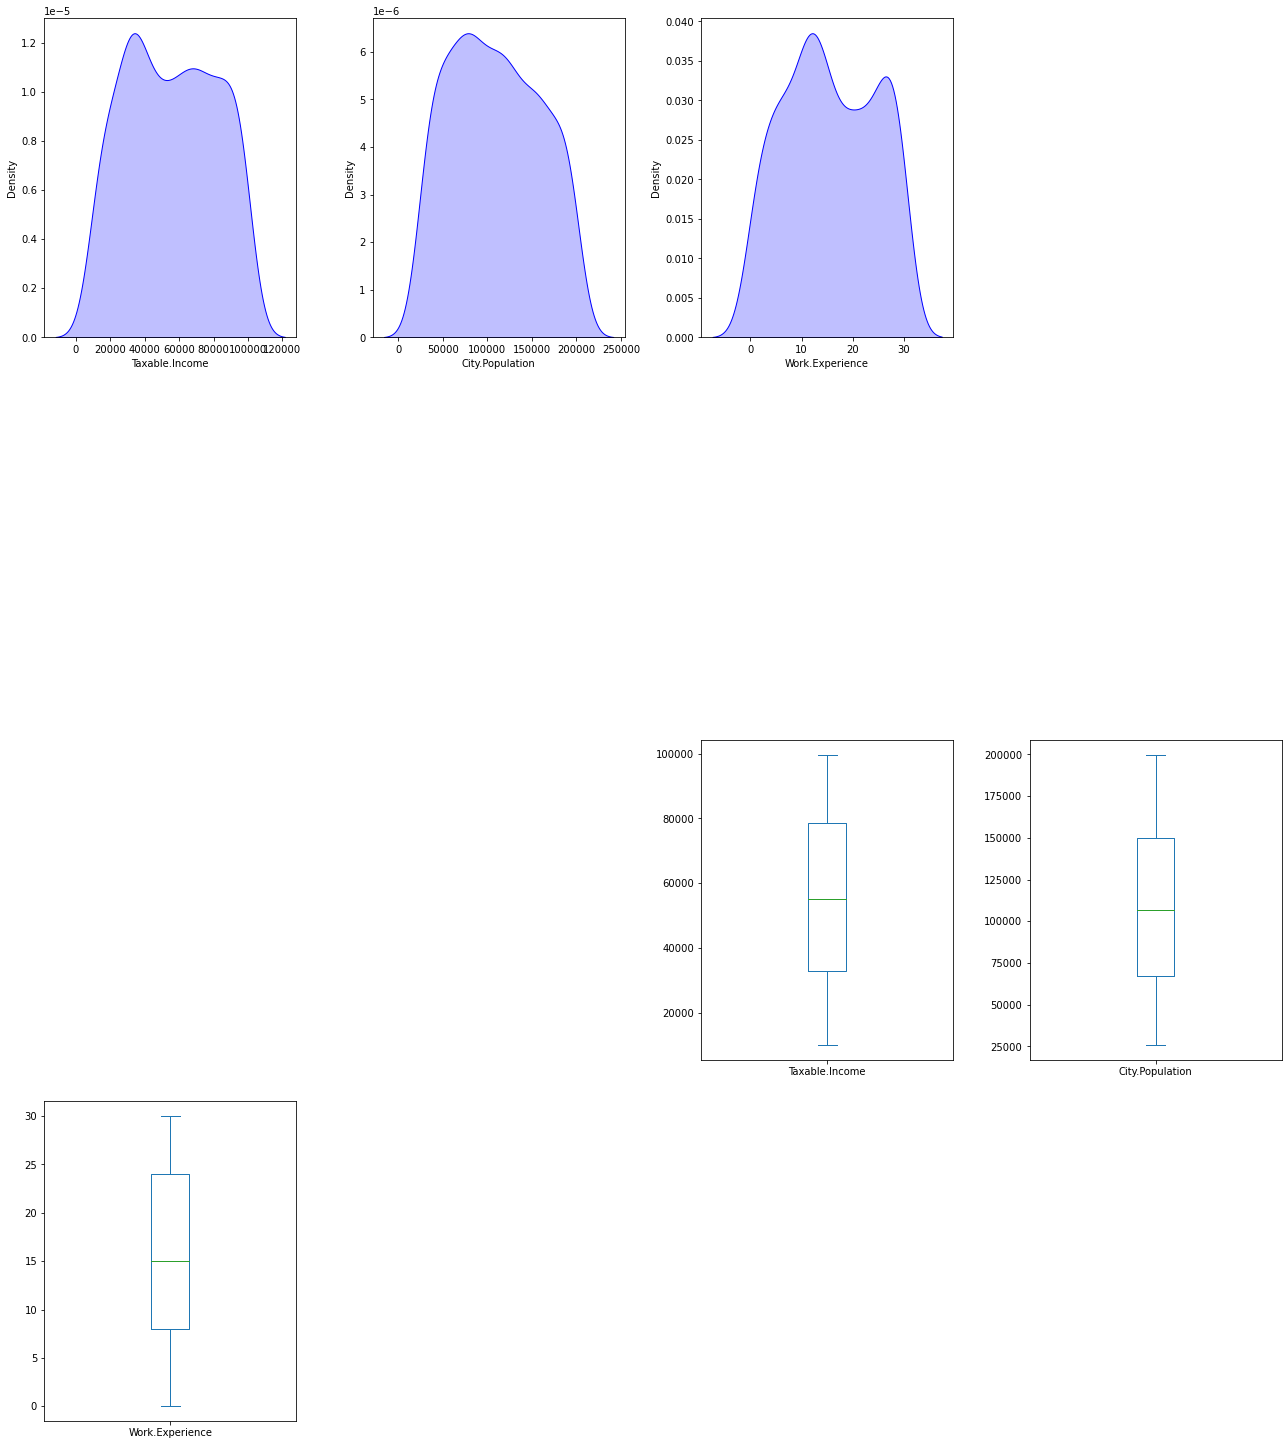

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [17]:

plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [19]:
corr = df1.corr()

<AxesSubplot:>

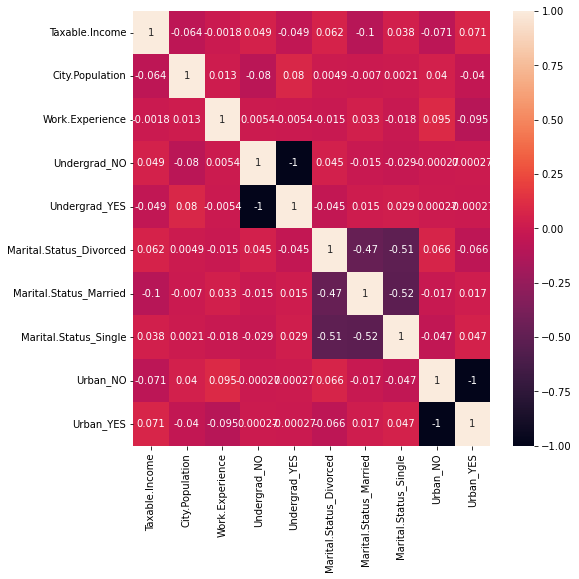

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

# Random Forest Model

In [21]:
#the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [22]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [23]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
y_train.value_counts()

good     380
risky    100
Name: Taxable.Income, dtype: int64

In [26]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7208333333333333

In [27]:
pred_train = model.predict(x_train)

In [35]:
model.feature_importances_

array([0.51676474, 0.35223015, 0.0180254 , 0.01626922, 0.02052742,
       0.02250226, 0.01902239, 0.01739399, 0.01726442])

In [39]:
FnI = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [40]:
FnI

,feature,importance
0,City.Population,0.516765
1,Work.Experience,0.352230
5,Marital.Status_Married,0.022502
4,Marital.Status_Divorced,0.020527
6,Marital.Status_Single,0.019022
2,Undergrad_NO,0.018025
7,Urban_NO,0.017394
8,Urban_YES,0.017264
3,Undergrad_YES,0.016269


In [28]:
accuracy_score(y_train,pred_train)

1.0

In [29]:
confusion_matrix(y_train,pred_train)

array([[380,   0],
       [  0, 100]], dtype=int64)

In [30]:
pred_test = model.predict(x_test)

In [31]:
accuracy_score(y_test,pred_test)

0.7583333333333333

In [32]:
confusion_matrix(y_test,pred_test)

array([[87,  9],
       [20,  4]], dtype=int64)

In [33]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [34]:
df_t

,Actual,Predicted
443,risky,good
373,good,good
101,good,good
179,risky,good
492,good,good
...,...,...
223,good,good
100,good,good
88,good,risky
276,good,good
